In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
datos = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv')

In [3]:
datos.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
datos.shape

(201, 29)

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

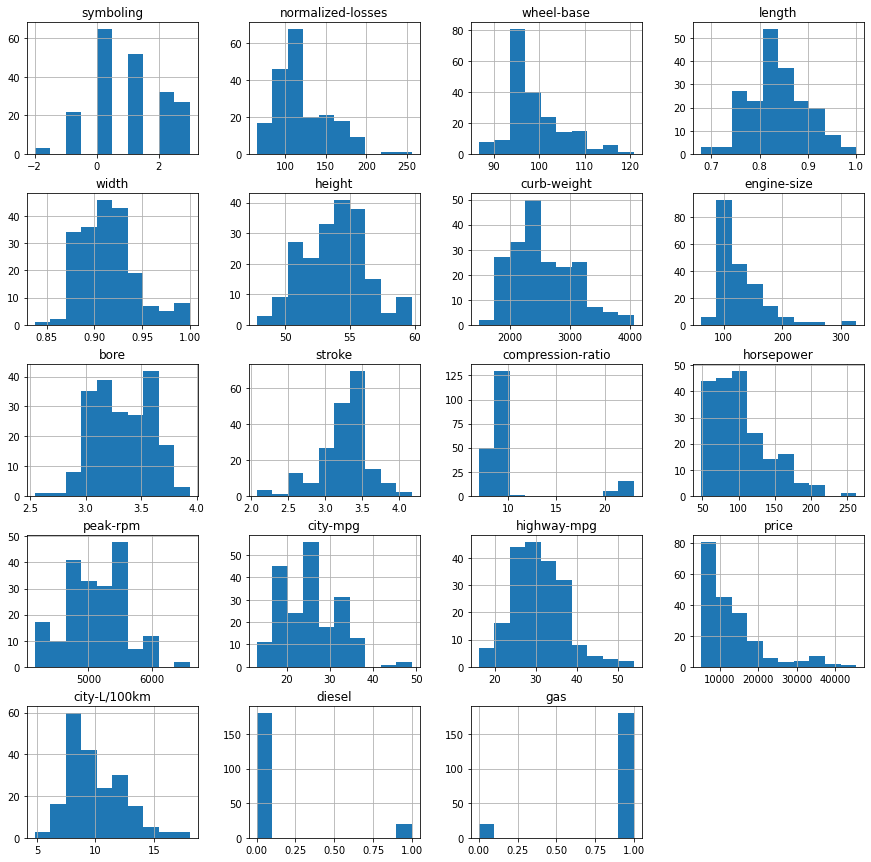

In [10]:
## Hagamos un histograma de los datos, esto nos permite visualizar cuáles distribuciones son gaussianas

datos.hist(figsize=(15,15))
plt.show()

In [19]:
## Prueba numérica de gaussianidad

## El test skewtest nos permite evaluar si una distribución es o no normal de acuerdo al pvalue
## Si este valor es muy pequeño rechazamos la hipotesis nula lo que en este caso significa rechazar que
## la distribución es normal.

from scipy.stats import skewtest, levene

#Temas de ciencias blandas --> Rechazar < 0.01
#Temas de algunas ciencias duras (fenomenolicas) <0.005
#Temas de ciencias duras (primeros principios) <0.001


print(skewtest(datos["price"]))
print(skewtest(datos["bore"]))
print(skewtest(datos['length']))
print(skewtest(datos['height']))
print(skewtest(datos['city-mpg']))
print(skewtest(datos['city-L/100km']))

SkewtestResult(statistic=7.639137730516152, pvalue=2.186812829722033e-14)
SkewtestResult(statistic=-0.19444018694922788, pvalue=0.8458312256893494)
SkewtestResult(statistic=0.9129599857019515, pvalue=0.36126358688245697)
SkewtestResult(statistic=0.17331747066746925, pvalue=0.8624018918960108)
SkewtestResult(statistic=3.7139739070340765, pvalue=0.0002040298403981413)
SkewtestResult(statistic=3.2919911469288343, pvalue=0.0009948074326561695)


<AxesSubplot:xlabel='bore', ylabel='Count'>

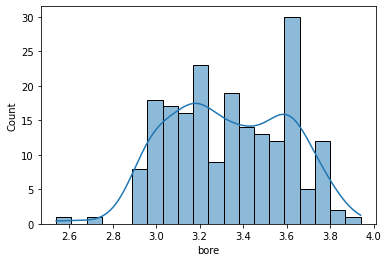

In [28]:
## Como vemos serían normales: bore, length y height
## No normales: price, city-mpg y city-L/100km

## Comparemos nuestros resultados con histogramas
## kde: marca una líndea de tendencia 

sns.histplot(data = datos , x = 'bore' , kde = True , bins = 20)


<AxesSubplot:xlabel='length', ylabel='Count'>

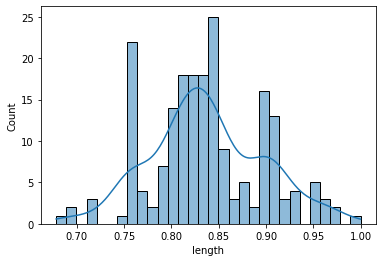

In [30]:
sns.histplot(data = datos , x = 'length' , kde = True , bins = 30)

<AxesSubplot:xlabel='height', ylabel='Count'>

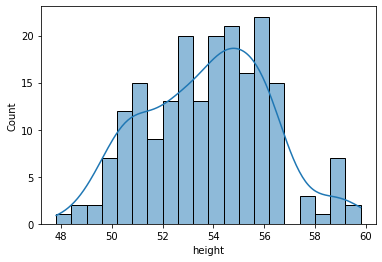

In [33]:
sns.histplot(data = datos , x = 'height' , kde = True , bins = 20)

<AxesSubplot:xlabel='price', ylabel='Count'>

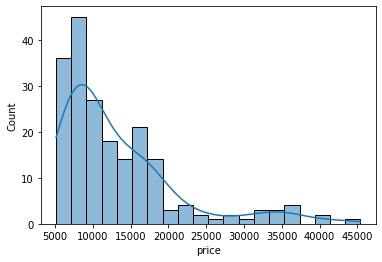

In [34]:
sns.histplot(data = datos , x = 'price' , kde = True , bins = 20)

<AxesSubplot:xlabel='city-mpg', ylabel='Count'>

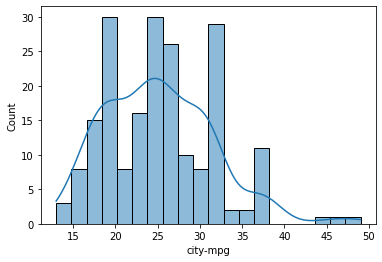

In [35]:
sns.histplot(data = datos , x = 'city-mpg' , kde = True , bins = 20)

<AxesSubplot:xlabel='city-L/100km', ylabel='Count'>

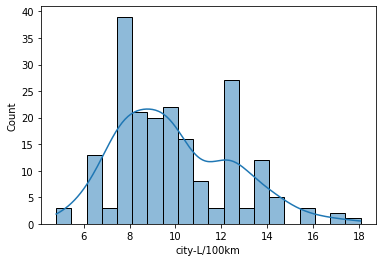

In [36]:
sns.histplot(data = datos , x = 'city-L/100km' , kde = True , bins = 20)

In [37]:
# test the null hypothesis that all input samples are from populations with equal variances

print(levene(datos["price"],datos["engine-size"]))

# A smaller p-value means that there is stronger evidence in favor of the alternative hypothesis.

LeveneResult(statistic=140.81734743196424, pvalue=4.916938115048979e-28)


In [41]:
print(levene(datos["city-mpg"],datos["price"]))

LeveneResult(statistic=142.04282196993498, pvalue=3.116976172349158e-28)


In [43]:
## Observamos que sí hay una relación lineal entre las variables. 
## Sin embargo, los tests de uniformidad de la distribución y homogeneidad arrojan resultados negativos. 
## Por lo tanto, la prueba de correlación apropiada para usar sería una prueba no paramétrica como la correlación
## de Spearman o de Kendall.

corr_k = datos.corr(method = "kendall")
corr_k

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.375720,-0.413205,-0.296122,-0.177592,-0.418942,-0.179961,-0.144436,-0.142360,-0.002349,0.023644,-0.012184,0.225972,-0.010302,0.038665,-0.104866,0.010302,-0.190877,0.190877
normalized-losses,0.375720,1.000000,-0.045157,0.028482,0.078305,-0.247791,0.079149,0.087686,-0.021958,0.078688,-0.050537,0.158850,0.175705,-0.182678,-0.145752,0.134911,0.182678,-0.080923,0.080923
wheel-base,-0.413205,-0.045157,1.000000,0.746966,0.656894,0.468104,0.609645,0.501344,0.409432,0.142993,-0.102371,0.367888,-0.224587,-0.366512,-0.403542,0.540313,0.366512,0.231086,-0.231086
length,-0.296122,0.028482,0.746966,1.000000,0.725730,0.380968,0.722186,0.599280,0.499211,0.107753,-0.134273,0.478809,-0.185232,-0.500317,-0.524061,0.636420,0.500317,0.159724,-0.159724
width,-0.177592,0.078305,0.656894,0.725730,1.000000,0.271977,0.680153,0.584820,0.446336,0.156687,-0.107198,0.505921,-0.147418,-0.507807,-0.518473,0.638911,0.507807,0.198105,-0.198105
height,-0.418942,-0.247791,0.468104,0.380968,0.271977,1.000000,0.254437,0.161993,0.160424,-0.021545,-0.012685,0.021840,-0.196572,-0.057001,-0.098166,0.182387,0.057001,0.245611,-0.245611
curb-weight,-0.179961,0.079149,0.609645,0.722186,0.680153,0.254437,1.000000,0.720936,0.537937,0.122862,-0.166549,0.619200,-0.167963,-0.644569,-0.670616,0.744265,0.644569,0.161817,-0.161817
engine-size,-0.144436,0.087686,0.501344,0.599280,0.584820,0.161993,0.720936,1.000000,0.532226,0.203609,-0.184297,0.660682,-0.199354,-0.584316,-0.579671,0.661342,0.584316,0.111066,-0.111066
bore,-0.142360,-0.021958,0.409432,0.499211,0.446336,0.160424,0.537937,0.532226,1.000000,-0.059778,-0.137246,0.472928,-0.223067,-0.450015,-0.460463,0.489625,0.450015,0.037211,-0.037211
stroke,-0.002349,0.078688,0.142993,0.107753,0.156687,-0.021545,0.122862,0.203609,-0.059778,1.000000,-0.029412,0.109124,-0.033302,-0.024057,-0.028546,0.094153,0.024057,0.267877,-0.267877


In [44]:
corr_k["price"].sort_values(ascending=False)  ## Vemos cómo se correlaciona price con los demás

price                1.000000
curb-weight          0.744265
horsepower           0.664788
engine-size          0.661342
city-L/100km         0.661282
width                0.638911
length               0.636420
wheel-base           0.540313
bore                 0.489625
height               0.182387
normalized-losses    0.134911
diesel               0.118449
stroke               0.094153
peak-rpm            -0.048705
symboling           -0.104866
gas                 -0.118449
compression-ratio   -0.136957
highway-mpg         -0.651805
city-mpg            -0.661282
Name: price, dtype: float64

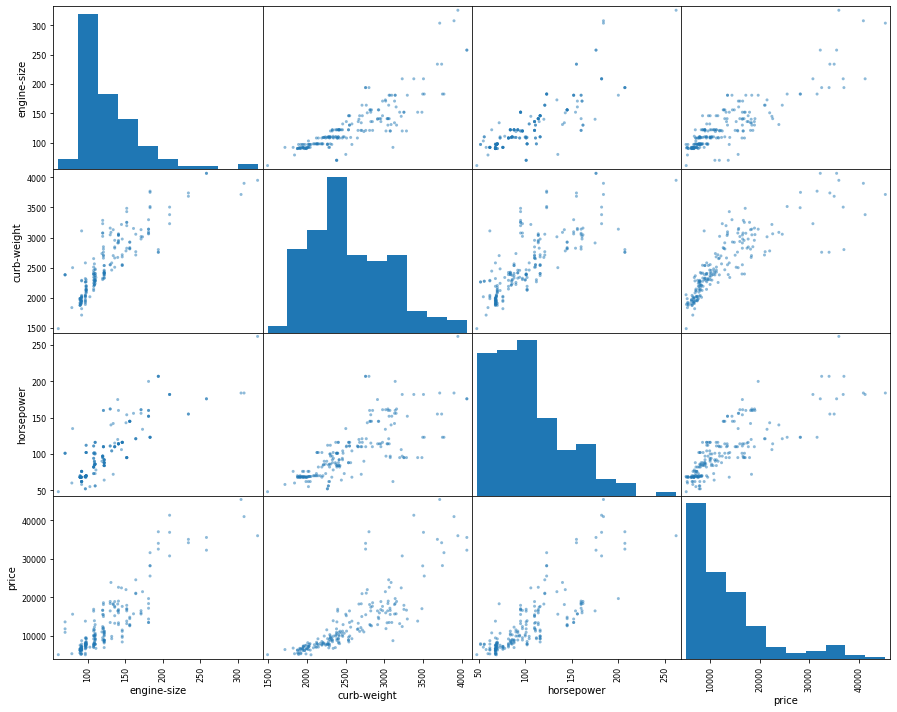

In [47]:
## Otra forma de verificar la correlación entre los atributos es usar el método `scatter_matrix`, que dibuja 
## cada atributo numérico contra cualquier otro atributo numérico. Como tenemos 29 columnas (se generarían 
## 29^2=841 gráficos), grafiquemos solo algunos de los atributos que tienen más correlación con el precio:

from pandas.plotting import scatter_matrix

attributes = ["engine-size","curb-weight","horsepower","price"]

scatter_matrix(datos[attributes], figsize=(15, 12))
plt.show()

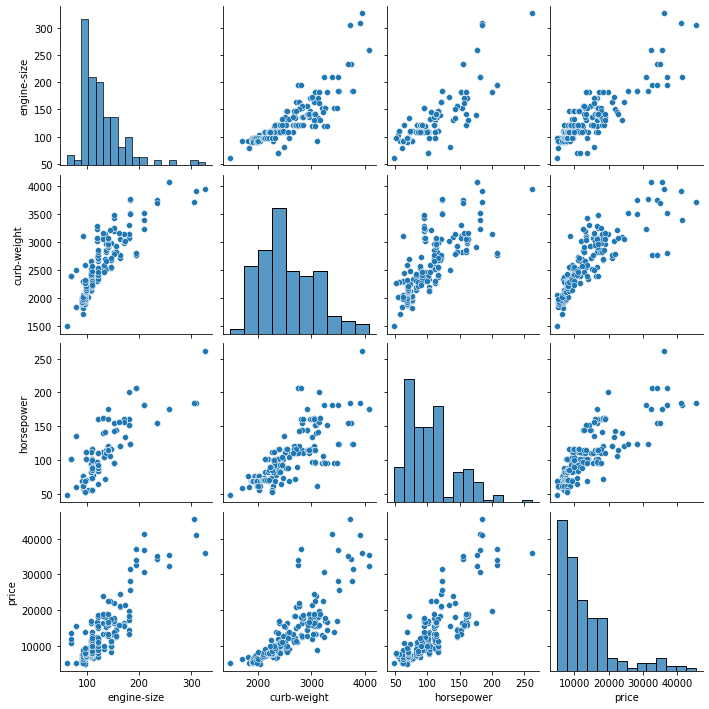

In [51]:
## Hagamos lo mismo esta vez con la libería seaborn

sns.pairplot(datos, vars = ["engine-size","curb-weight","horsepower","price"])

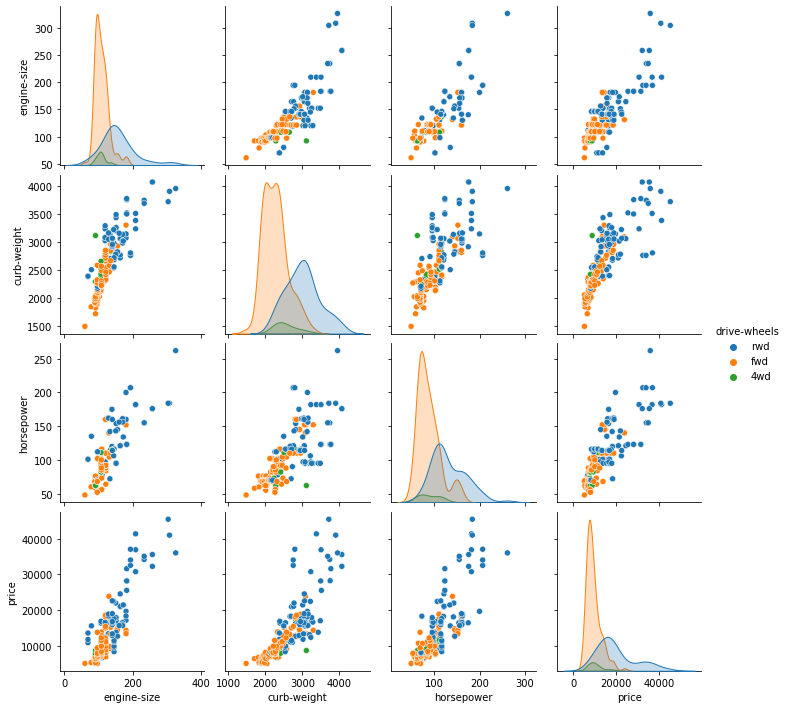

In [50]:
## Ahora discriminando por el tipo de tracción

sns.pairplot(datos, hue = "drive-wheels", vars = ["engine-size","curb-weight","horsepower","price"])

"ax.set_xticklabels(\n    ax.get_xticklabels(),\n    rotation=45,\n    horizontalalignment='right'\n);"

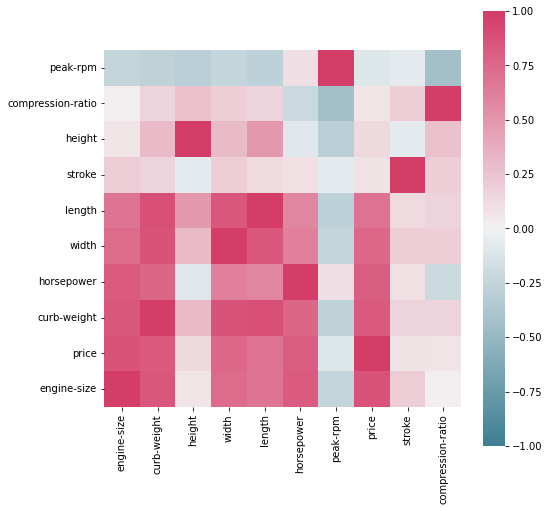

In [52]:
plt.figure(figsize=(8,8))
df_new = datos[['engine-size','curb-weight','height','width','length','horsepower','peak-rpm','price','stroke','compression-ratio']]
corr_new = df_new.corr().sort_values(by='engine-size')

ax = sns.heatmap(
    corr_new, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(220, 0, n=200),
    square=True
)

"""ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);"""